# Heart Sound Classification

## Exploratory Data Analysis

### Sound Samples

In [ ]:
!curl https://physionet.org/files/challenge-2016/1.0.0/training.zip?download > physio.zip)
!unzip physio.zip

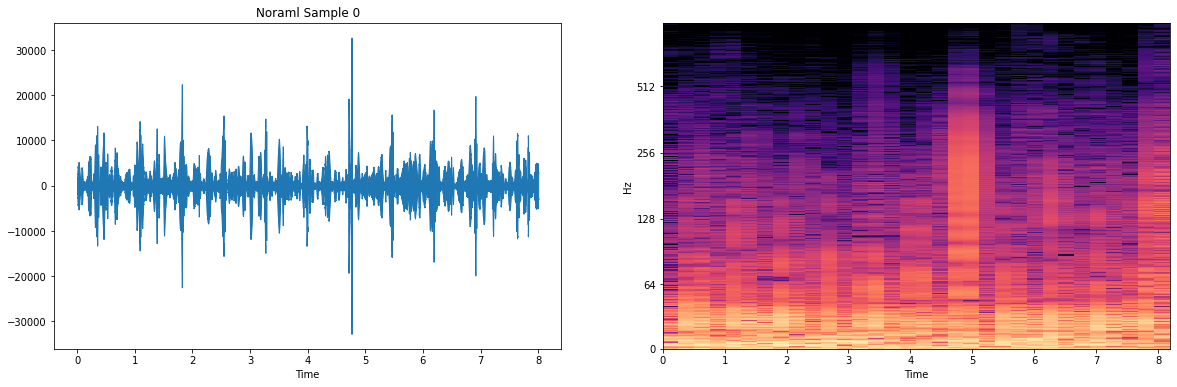

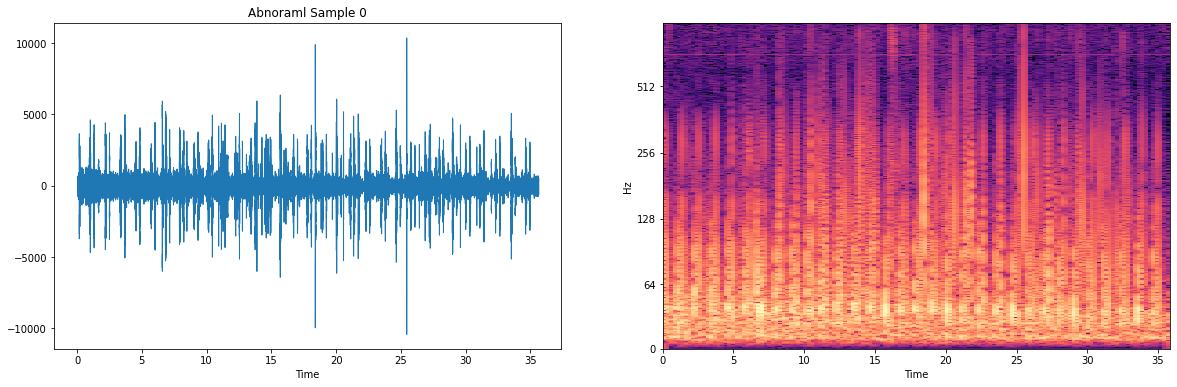

In [1]:
from notebook_utils import view_random_samples
view_random_samples(n_samples=1, seed=0)

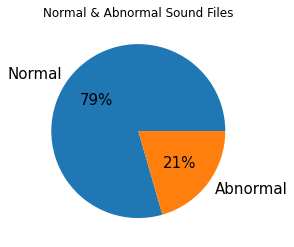

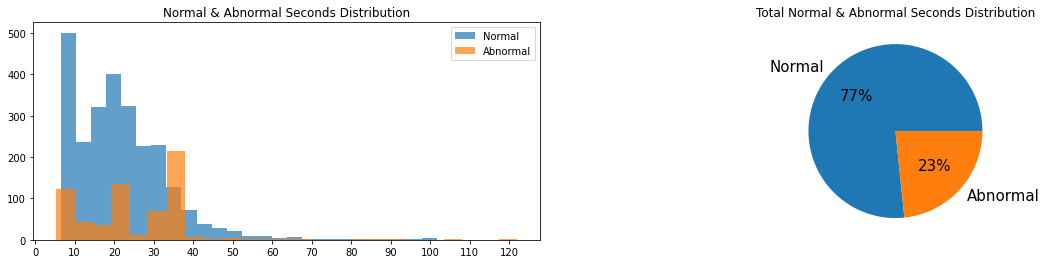

In [2]:
from notebook_utils import view_files_dist, view_seconds_dist

view_files_dist()
view_seconds_dist()

# Preprocssing

## Wavelet Denoising
#### Wavelets denoising has proven improvments in heart sound as it decreases the SNR which helps in better analysis of heart sound

![](./docs/db6.png)

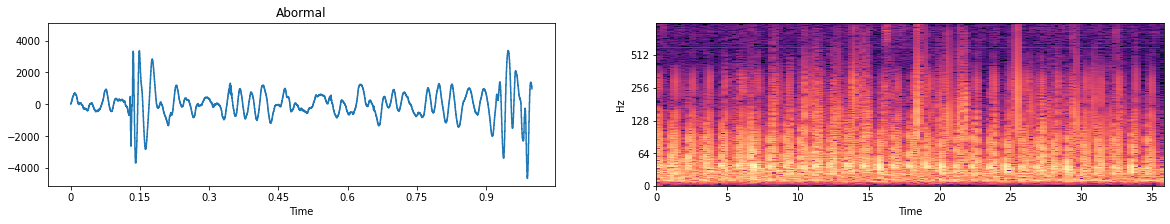

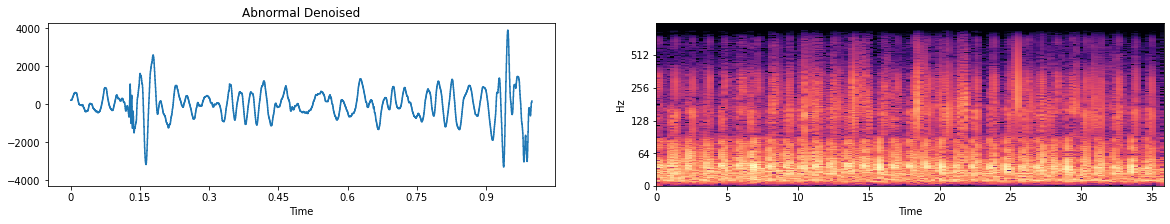

In [3]:
from notebook_utils import view_wavlet_denoising

view_wavlet_denoising()

## Feature Extraction

#### Features are extracted from the wav files after loading and we can catergorize them into : -
- Signal & Information Theory Features
- Statsitical Features
- Mel Frequency Features (MFCCs)

#### The feature vector is as follows

|Max_Amplitude|Dominant_Freq|Entropy|Mean|Median|STD|Kurtosis|Skewness|IQR|First_Percentile|Second_Percentile|Third_Percentile|MFCC1|MFCC2|MFCC3|MFCC4|MFCC5|MFCC6|MFCC7|MFCC8|MFCC9|MFCC10|MFCC11|MFCC12|MFCC13|
|---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |




#### For example for feature extraction from sound we apply our method `extract_segment_features` to the sound we need to process

In [4]:
from feature_extraction import extract_segment_features
import notebook_utils
print([extract_segment_features(notebook_utils.normal_physio[0][0])])

[[15336.0, 61.68339595132619, 7.823496394742312, -0.8233752, -12.0, 1949.9056, 10.474070636603942, 0.5970103144645691, 1325.0, -684.0, -12.0, 641.0, 717.7162, 183.30186, 62.721714, 31.714529, 20.975115, 12.493455, 1.0861756, -3.20467, 0.104761094, 2.4396908, -0.24846704, 1.2432269, 2.0796418]]


#### In our case we can benefit that the sound recordings contains many heart sound cycles so segmenting the heart sound by taking every N cycles togther and we have found N to be 5 is a good number to be able to get useful features and more data segments

In [5]:
from segmentation import build_segements
import notebook_utils
segmented_sounds = build_segements(notebook_utils.physio_arr, sr=2000)
print(len(segmented_sounds))

16749


#### After creating the segements we will extract the features form them and build out dataframe of features to train with using `construct_dataframe`

In [6]:
import os
from feature_extraction import construct_dataframe

if(not os.path.exists("physioNet.csv")):
    construct_dataframe("physioNet")
print("---------------------- DataSet is Ready ----------------------")

---------------------- DataSet is Ready ----------------------


#### Now we can read the csv file using we constructed by `load_heartsound_features`

#### As we can se we have a slight imbalance probelm between classes so we have down sampled some of the majorty class (normal) to improve the class distribution

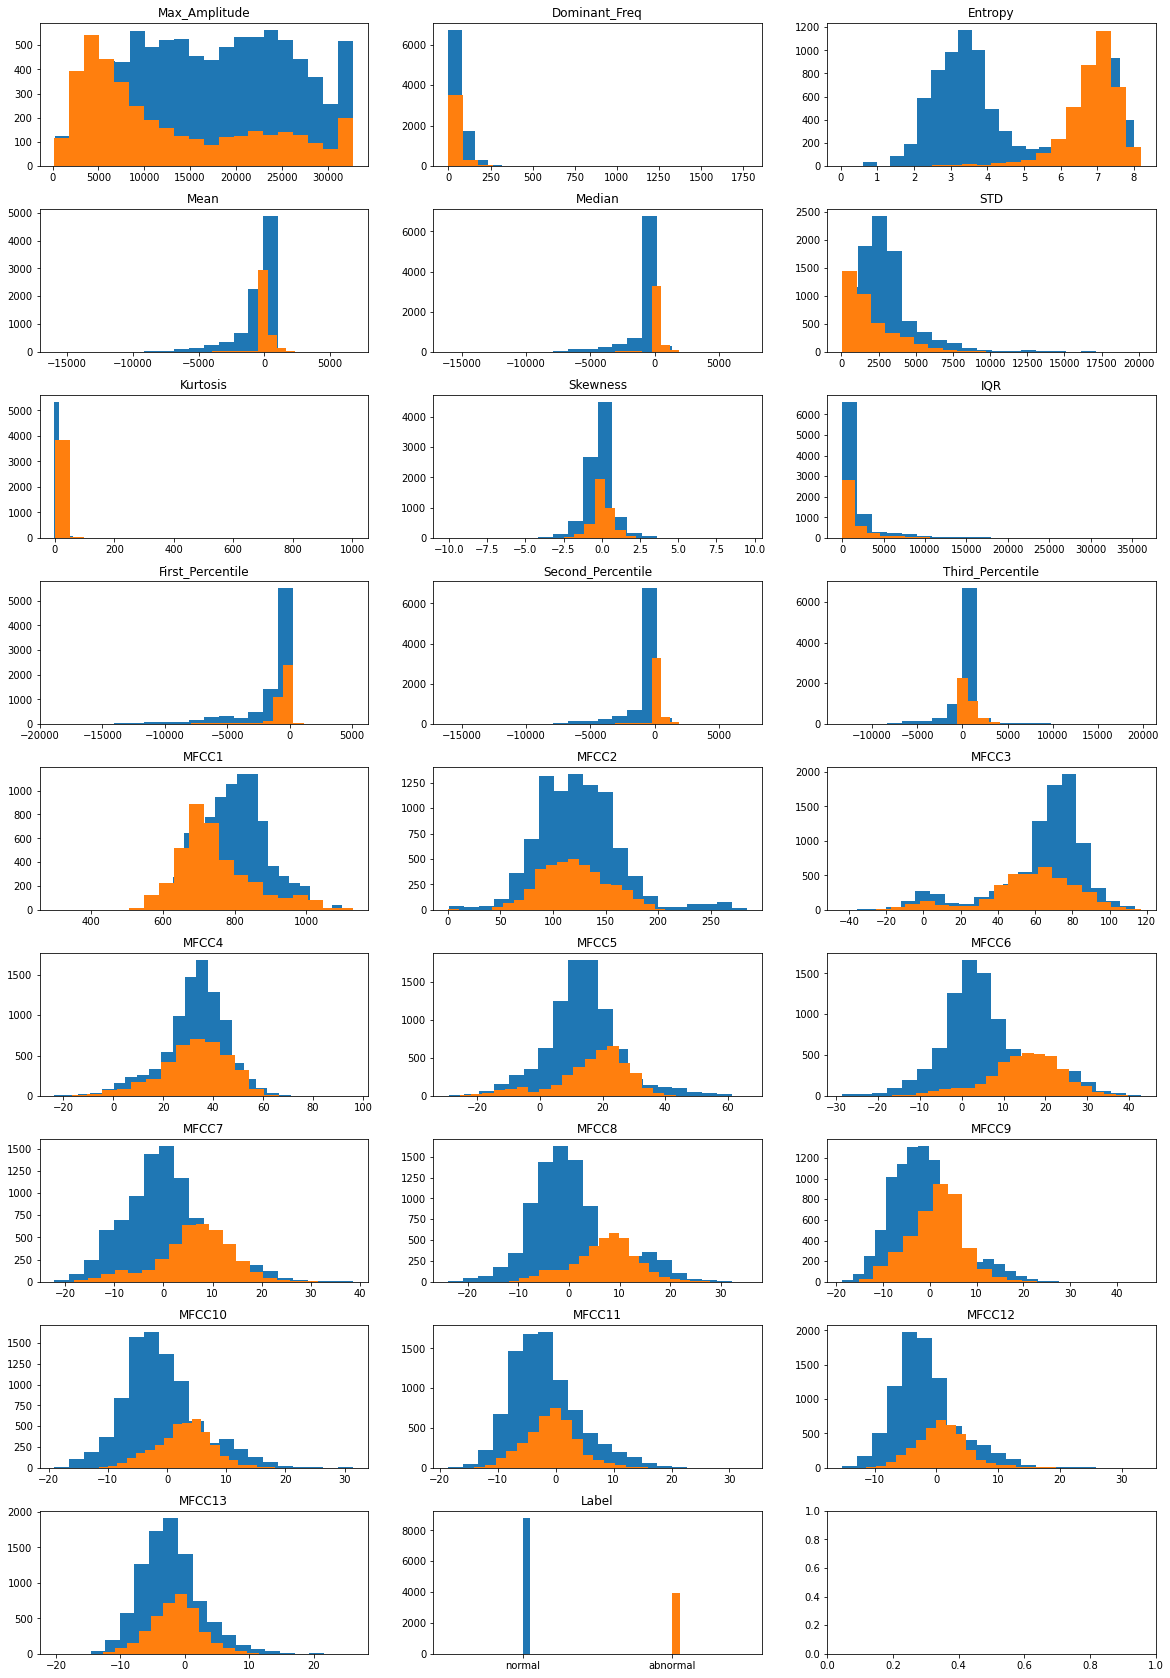

In [7]:
from utils import features_histo, load_heartsound_features
import pandas as pd

hs_df, normal_df, abnormal_df = load_heartsound_features()
dfs = [normal_df, abnormal_df]
features_histo(dfs)

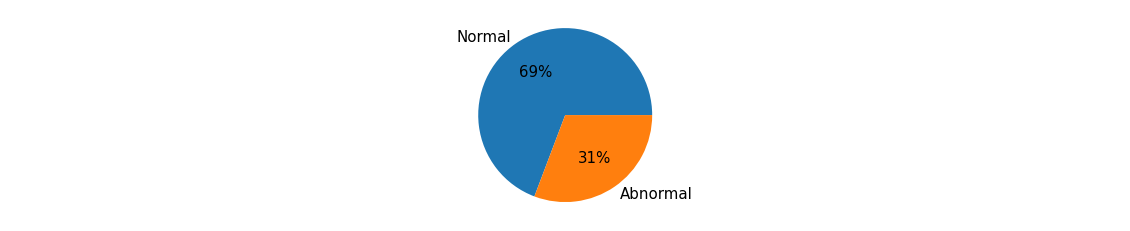

In [8]:
from notebook_utils import view_downsampled_dist

view_downsampled_dist()

## Feature Selection

#### By performing variance based feature selection we have reduced the number of features from 26 to 14, we also created pca features to analyze them

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 0.99)
var_threshold = VarianceThreshold(threshold = 0.011)

y = hs_df["Label"].to_numpy() == "normal"
y = y.astype(np.int16)
X = hs_df.drop(columns=["Label"])
X = MinMaxScaler().fit_transform(X)
var_threshold.fit(X)

X_RLVF = var_threshold.transform(X)
principal_X = pca.fit_transform(X)
principal_X_RLVF = pca.fit_transform(X_RLVF)

print(X_RLVF.shape)

(12749, 14)


## Modeling

#### Based on the literature we have tried 3 models (Support Vecotr Machine, Random Forest, XGBoost).
##### For paramter tuning we have used grid search method with the potential params

classirier name SVM


SVM

,0,1,accuracy,macro avg,weighted avg
precision,0.867893,0.949932,0.924276,0.908912,0.924842
recall,0.887483,0.940485,0.924276,0.913984,0.924276
f1-score,0.877579,0.945185,0.924276,0.911382,0.924509
support,2924.000000,6637.000000,0.924276,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.883130,0.941470,0.923463,0.912300,0.923207
recall,0.870741,0.947489,0.923463,0.909115,0.923463
f1-score,0.876892,0.944470,0.923463,0.910681,0.923315
support,998.000000,2190.000000,0.923463,3188.000000,3188.000000


Random Forest

,0,1,accuracy,macro avg,weighted avg
precision,0.818035,0.939230,0.90001,0.878632,0.902165
recall,0.865595,0.915173,0.90001,0.890384,0.900010
f1-score,0.841143,0.927045,0.90001,0.884094,0.900774
support,2924.000000,6637.000000,0.90001,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.820736,0.929963,0.894605,0.875350,0.895770
recall,0.848697,0.915525,0.894605,0.882111,0.894605
f1-score,0.834483,0.922688,0.894605,0.878585,0.895075
support,998.000000,2190.000000,0.894605,3188.000000,3188.000000


XGboost

,0,1,accuracy,macro avg,weighted avg
precision,0.893164,0.951278,0.933584,0.922221,0.933505
recall,0.889193,0.953141,0.933584,0.921167,0.933584
f1-score,0.891174,0.952209,0.933584,0.921691,0.933543
support,2924.000000,6637.000000,0.933584,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.870103,0.930568,0.912171,0.900336,0.911640
recall,0.845691,0.942466,0.912171,0.894079,0.912171
f1-score,0.857724,0.936479,0.912171,0.897101,0.911825
support,998.000000,2190.000000,0.912171,3188.000000,3188.000000


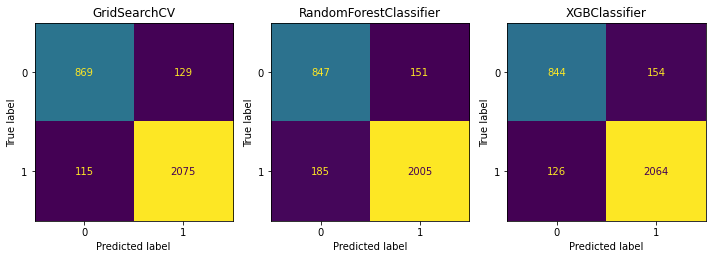

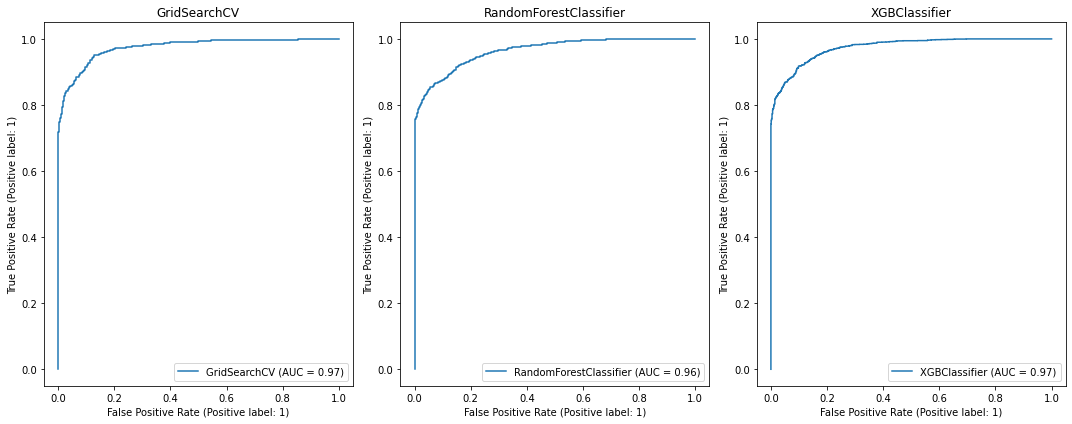

In [10]:
from notebook_utils import compare
from classifiers import classifiers

params = compare(classifiers, X, y,grid_search=["SVM"])


classirier name SVM


SVM

,0,1,accuracy,macro avg,weighted avg
precision,0.939590,0.974212,0.963602,0.956901,0.963624
recall,0.941518,0.973331,0.963602,0.957425,0.963602
f1-score,0.940553,0.973771,0.963602,0.957162,0.963613
support,2924.000000,6637.000000,0.963602,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.910402,0.948579,0.936951,0.929490,0.936628
recall,0.885772,0.960274,0.936951,0.923023,0.936951
f1-score,0.897918,0.954391,0.936951,0.926154,0.936712
support,998.000000,2190.000000,0.936951,3188.000000,3188.000000


Random Forest

,0,1,accuracy,macro avg,weighted avg
precision,0.820046,0.931936,0.896559,0.875991,0.897718
recall,0.847811,0.918035,0.896559,0.882923,0.896559
f1-score,0.833698,0.924934,0.896559,0.879316,0.897031
support,2924.000000,6637.000000,0.896559,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.820641,0.918265,0.887704,0.869453,0.887704
recall,0.820641,0.918265,0.887704,0.869453,0.887704
f1-score,0.820641,0.918265,0.887704,0.869453,0.887704
support,998.000000,2190.000000,0.887704,3188.000000,3188.000000


XGboost

,0,1,accuracy,macro avg,weighted avg
precision,0.894260,0.960498,0.93986,0.927379,0.940241
recall,0.911081,0.952539,0.93986,0.931810,0.939860
f1-score,0.902592,0.956502,0.93986,0.929547,0.940015
support,2924.000000,6637.000000,0.93986,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.841365,0.927007,0.900251,0.884186,0.900197
recall,0.839679,0.927854,0.900251,0.883767,0.900251
f1-score,0.840522,0.927430,0.900251,0.883976,0.900224
support,998.000000,2190.000000,0.900251,3188.000000,3188.000000


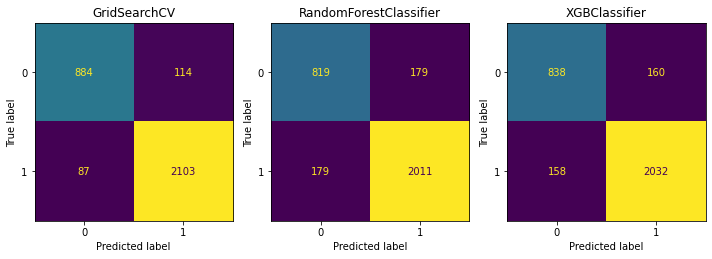

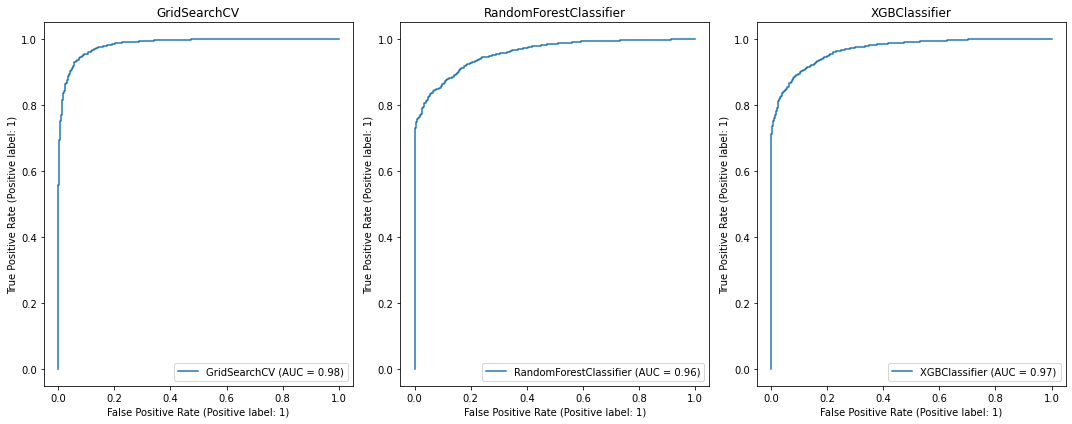

In [11]:
params_pca = compare(classifiers, principal_X, y,grid_search=["SVM"])

classirier name SVM


SVM

,0,1,accuracy,macro avg,weighted avg
precision,0.925353,0.964833,0.952829,0.945093,0.952759
recall,0.919973,0.967305,0.952829,0.943639,0.952829
f1-score,0.922655,0.966067,0.952829,0.944361,0.952791
support,2924.000000,6637.000000,0.952829,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.900724,0.942819,0.93005,0.921771,0.929641
recall,0.872745,0.956164,0.93005,0.914455,0.930050
f1-score,0.886514,0.949445,0.93005,0.917979,0.929744
support,998.000000,2190.000000,0.93005,3188.000000,3188.000000


Random Forest

,0,1,accuracy,macro avg,weighted avg
precision,0.821695,0.924368,0.892689,0.873032,0.892968
recall,0.829001,0.920747,0.892689,0.874874,0.892689
f1-score,0.825332,0.922554,0.892689,0.873943,0.892821
support,2924.000000,6637.000000,0.892689,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.810675,0.912073,0.880489,0.861374,0.880330
recall,0.806613,0.914155,0.880489,0.860384,0.880489
f1-score,0.808639,0.913113,0.880489,0.860876,0.880407
support,998.000000,2190.000000,0.880489,3188.000000,3188.000000


XGboost

,0,1,accuracy,macro avg,weighted avg
precision,0.902699,0.967226,0.946972,0.934962,0.947492
recall,0.926471,0.956004,0.946972,0.941237,0.946972
f1-score,0.914430,0.961582,0.946972,0.938006,0.947162
support,2924.000000,6637.000000,0.946972,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.844311,0.930467,0.903388,0.887389,0.903496
recall,0.847695,0.928767,0.903388,0.888231,0.903388
f1-score,0.846000,0.929616,0.903388,0.887808,0.903440
support,998.000000,2190.000000,0.903388,3188.000000,3188.000000


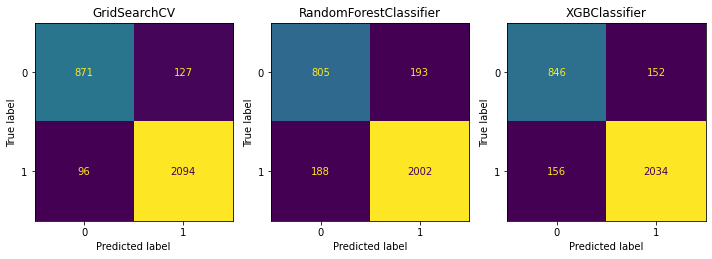

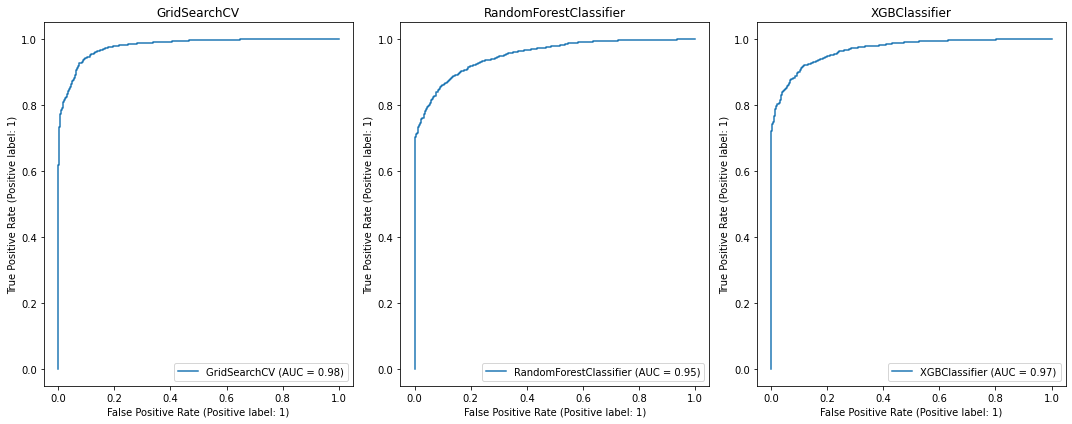

In [12]:
params_pca_with_RLVF = compare(classifiers, principal_X_RLVF, y,grid_search=["SVM"])